# Mapas, matplotlib

Es obvia la importacia de los mapas, para la visualizacion de datos. Las coordenadas, latitud y longitud, pueden describir un punto sobre la tierra. Utilizamos estandares como WGS94 para atar esas coordenadas a un punto real. 


## Ambiente de Trabajo


```bash
$ #ESTE_ENV = midevenviroment
$ source ~/miniconda3/envs/$ESTE_ENV/bin/activate

$ conda install jupyter-notebook
$ conda install gdal -c conda-forge
$ conda install basemap -c conda-forge
$ conda install pandas seaborn
$ ln -s /home/tian/miniconda3/pkgs/basemap-1.1.0-py36_2/lib/python3.6/site-packages/mpl_toolkits/basemap/data/ /usr/share/basemap
```



In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.colors as colors
from numpy import array
from numpy import max
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="white", color_codes=True)

%matplotlib inline

In [5]:
df = pd.read_csv('hiv_cr_data.csv')
df.columns
df.shape # (71, 8)
df.describe()
df.columns
df.loc[df.coordenadas == df.coordenadas]
subset = df.loc[df.coordenadas == df.coordenadas] 
coordenadas = subset[['sitio','latitud', 'longitud', 'coordenadas']]
coordenadas.head()

,sitio,latitud,longitud,coordenadas
0,Esquina Sureste de la Iglesia del Corazón de J...,10.018010,-84.216480,"(10.01801 , -84.21648)"
1,Parque Central de Alajuela,10.016787,-84.213914,"(10.016787 , -84.213914)"
2,"Parque de las Palmas, costado sur del hospital...",10.020168,-84.214064,"(10.020168 , -84.214064)"
3,Mall Internacional,10.006020,-84.212740,"(10.00602 , -84.21274)"
4,Ojo de Agua,9.985120,-84.195540,"(9.98512 , -84.19554)"


/home/tian/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/tian/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


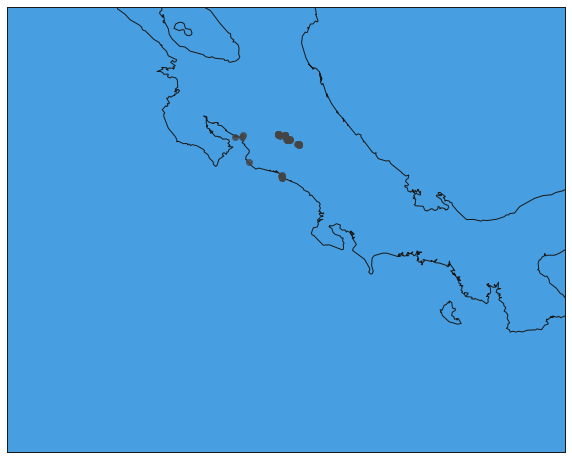

In [6]:
fig, ax = plt.subplots(figsize=(10,20))

mapa = Basemap(projection='merc', 
    lat_0 = 9.74, lon_0 = -83.5,
    resolution = 'i',
    llcrnrlon=-88.1, llcrnrlat=5.5,
    urcrnrlon=-80.1, urcrnrlat=11.8)

mapa.drawmapboundary(fill_color='#479EE0')
mapa.drawcoastlines()


from ast import literal_eval as make_tuple
def unpac(t):
    # haciendo trampa en la vida
    return pd.Series(make_tuple(t))

def plot_area(pos):
    ps = unpac(pos)
    x, y = mapa(ps[1], ps[0])
    mapa.plot(x, y, 'o', markersize=7, color='#444444', alpha=0.8)
    
    
coordenadas.coordenadas.apply(plot_area)


lt.show()

In [25]:
clox = array(coordenadas['longitud'])
clay = array(coordenadas['latitud'])

In [32]:
clay.mean()

9.8856495522388084

/home/tian/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/tian/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


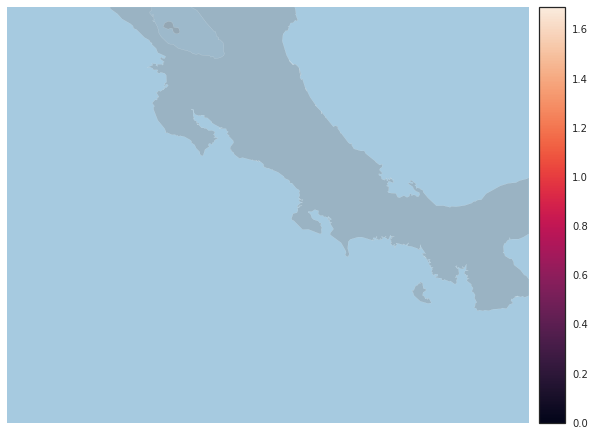

In [41]:
plt.figure(2)
#fig.add_subplot(223)
fig2, ax2 = plt.subplots(figsize=(10,20))

mapa2 = Basemap(projection='merc', 
    lat_0 = 9.74, lon_0 = -83.5,
    resolution = 'i',
    llcrnrlon=-88.1, llcrnrlat=5.5,
    urcrnrlon=-80.1, urcrnrlat=11.8)
mapa2.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
mapa2.fillcontinents(color='grey', alpha=0.3)
mapa2.drawcoastlines(linewidth=0.1, color="white")

#mapa2.kdeplot(clox, clay, cmap='summer', bins='log', shade_lowest=True)
mapa2.hexbin(clox, clay, gridsize=2,
    bins='log',)
    # mincnt=0,
    #edgecolor='none',)
mapa2.colorbar()

plt.show()


RuntimeError: Can not put single artist in more than one figure

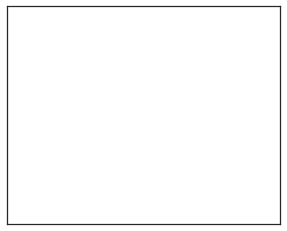